#MSCOCO Dataset EDA


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pwd

/content


In [3]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pdb
import os
from pycocotools.coco import COCO
from skimage import io

### Part 0: Introduction to the COCO Dataset¶
The Microsoft Common Objects in COntext (MS COCO) dataset is a large-scale dataset for scene understanding. The dataset is commonly used to train and benchmark object detection, segmentation, and captioning algorithms. It is avaliable at https://cocodataset.org/#download. The COCO train, validation, and test sets, containing more than 200,000 images and 80 object categories.

Our dataset structure:
- under Images:
  - 2017 Train
  - 2017 Test images
  - 2017 Val images
  - 2017 Unlabled images
- under Annotations:
  - 2017 Train/Val annotations
  - 2017 Stuff Train/Val annotations
  - 2017 Testing Image info
  - 2017 Unlabeled Image info




Part 1: Initialize the COCO API


In [4]:
import os
os.chdir('/content/drive/MyDrive/AC215/AC215-Project/') # heather path
!pwd

/content/drive/.shortcut-targets-by-id/1JAy_hh-fqfIJAo3RUuNuCaU86kigJmbr/AC215 Project


In [5]:
src_root = './dataset/'
src_subset = 'image/train2017'
dataType = 'train2017'

# initialize COCO API for instance annotations
instances_annFile = os.path.join(src_root,'annotation/annotations/instances_{}.json'.format(dataType))
coco_obj = COCO(instances_annFile)

# initialize COCO API for caption annotations
captions_annFile = os.path.join(src_root,'annotation/annotations/captions_{}.json'.format(dataType))
coco_caps = COCO(captions_annFile)

src_desc = 'train2017_coco' # a name (identifier) for the dataset

# get image ids 
ids = list(coco_obj.anns.keys())

loading annotations into memory...
Done (t=18.58s)
creating index...
index created!
loading annotations into memory...
Done (t=1.12s)
creating index...
index created!


In [6]:
# Reading the instances_annFile json file
with open(instances_annFile, 'r') as f:
    root_obj = json.load(f)
print(root_obj.keys())


dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])


In [7]:
display('info', root_obj['info'])
display('image', root_obj['images'][0])
display('annotations',root_obj['annotations'][0])
display('categories', root_obj['categories'][0])

'info'

{'contributor': 'COCO Consortium',
 'date_created': '2017/09/01',
 'description': 'COCO 2017 Dataset',
 'url': 'http://cocodataset.org',
 'version': '1.0',
 'year': 2017}

'image'

{'coco_url': 'http://images.cocodataset.org/train2017/000000391895.jpg',
 'date_captured': '2013-11-14 11:18:45',
 'file_name': '000000391895.jpg',
 'flickr_url': 'http://farm9.staticflickr.com/8186/8119368305_4e622c8349_z.jpg',
 'height': 360,
 'id': 391895,
 'license': 3,
 'width': 640}

'annotations'

{'area': 2765.1486500000005,
 'bbox': [199.84, 200.46, 77.71, 70.88],
 'category_id': 58,
 'id': 156,
 'image_id': 558840,
 'iscrowd': 0,
 'segmentation': [[239.97,
   260.24,
   222.04,
   270.49,
   199.84,
   253.41,
   213.5,
   227.79,
   259.62,
   200.46,
   274.13,
   202.17,
   277.55,
   210.71,
   249.37,
   253.41,
   237.41,
   264.51,
   242.54,
   261.95,
   228.87,
   271.34]]}

'categories'

{'id': 1, 'name': 'person', 'supercategory': 'person'}

In [8]:
# Reaing the captions_annFile json file
with open(captions_annFile, 'r') as f:
    root_cap = json.load(f)

print(root_cap.keys())
display('info',root_cap['info'])
display('image', root_cap['images'][0])
display('annotations', root_cap['annotations'][0])

dict_keys(['info', 'licenses', 'images', 'annotations'])


'info'

{'contributor': 'COCO Consortium',
 'date_created': '2017/09/01',
 'description': 'COCO 2017 Dataset',
 'url': 'http://cocodataset.org',
 'version': '1.0',
 'year': 2017}

'image'

{'coco_url': 'http://images.cocodataset.org/train2017/000000391895.jpg',
 'date_captured': '2013-11-14 11:18:45',
 'file_name': '000000391895.jpg',
 'flickr_url': 'http://farm9.staticflickr.com/8186/8119368305_4e622c8349_z.jpg',
 'height': 360,
 'id': 391895,
 'license': 3,
 'width': 640}

'annotations'

{'caption': 'A bicycle replica with a clock as the front wheel.',
 'id': 37,
 'image_id': 203564}

# Part 2: EDA


#captions_train2017.json

## Viewing random images

http://images.cocodataset.org/train2017/000000332405.jpg


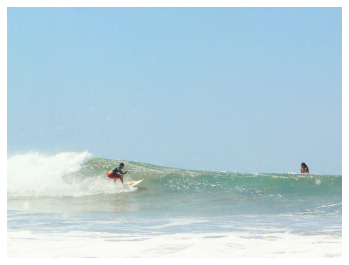

A couple of people riding on top of a wave on surfboards.
A man rides a white surfboard near another person in the ocean.
one person surfing one person laying on a surfboard 
The guy is riding the wave as a girl watches.
Surfers surfing in the ocean on a clear day.


In [9]:
# pick a random image and obtain the corresponding URL
ann_id = np.random.choice(ids)
img_id = coco_obj.anns[ann_id]['image_id']
img = coco_obj.loadImgs(img_id)[0]
url = img['coco_url']

# print URL and visualize corresponding image
print(url)
plt.figure( figsize=(6,6))
I = io.imread(url)
plt.axis('off')
plt.imshow(I)
plt.show()

# load and display captions
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)

In [10]:
anns

[{'caption': 'A couple of people riding on top of a wave on surfboards.',
  'id': 224567,
  'image_id': 332405},
 {'caption': 'A man rides a white surfboard near another person in the ocean.',
  'id': 247190,
  'image_id': 332405},
 {'caption': 'one person surfing one person laying on a surfboard ',
  'id': 255314,
  'image_id': 332405},
 {'caption': 'The guy is riding the wave as a girl watches.',
  'id': 256283,
  'image_id': 332405},
 {'caption': 'Surfers surfing in the ocean on a clear day.',
  'id': 256733,
  'image_id': 332405}]

In [11]:
# Basic High Level Information
n_images = len(root_cap['images'])
n_caps = len(root_cap['annotations'])
heights = [img['height'] for img in root_cap['images']]
widths = [img['width'] for img in root_cap['images']]

print('Dataset Name: ',src_desc)
print('Number of images: ',n_images)
print('Number of captions: ', n_caps)

print('Max min avg image height: ', max(heights), min(heights), int(sum(heights)/len(heights)))
print('Max min avg imgae width: ', max(widths), min(widths), int(sum(widths)/len(widths)))

Dataset Name:  train2017_coco
Number of images:  118287
Number of captions:  591753
Max min avg image height:  640 51 484
Max min avg imgae width:  640 59 577


There is total 118287 images in train2017.

In [12]:
# Objects per image distribution

img2ncaps = {} # mapping "image id" to "number of captions"

for ann in root_cap['annotations']:
    img_id = ann['image_id']
    
    if img_id in img2ncaps.keys():
        img2ncaps[img_id] += 1
    else:
        img2ncaps[img_id] = 1

ncaps_list = list(img2ncaps.values())

min_ncaps = min(ncaps_list)
max_ncaps = max(ncaps_list)
avg_ncaps = int(sum(ncaps_list)/len(ncaps_list))

print("Number of images having at least one captions: ", len(ncaps_list))
print("Min number of captions per image: ", min_ncaps)
print("Max number of captions per image: ", max_ncaps)
print("Avg number of captions per image: ", avg_ncaps)
length = []
for c in root_cap['annotations']:
  x = c['caption']
  length.append(len(x))

print('max len of a caption: ', max(length))

Number of images having at least one captions:  118287
Min number of captions per image:  5
Max number of captions per image:  7
Avg number of captions per image:  5
max len of a caption:  250


Text(0, 0.5, 'count')

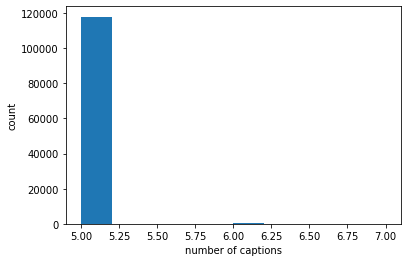

In [13]:
plt.hist(ncaps_list)
plt.xlabel('number of captions')
plt.ylabel('count')

Almost every image has 5 captions.

maximum caption length(number of words):  49


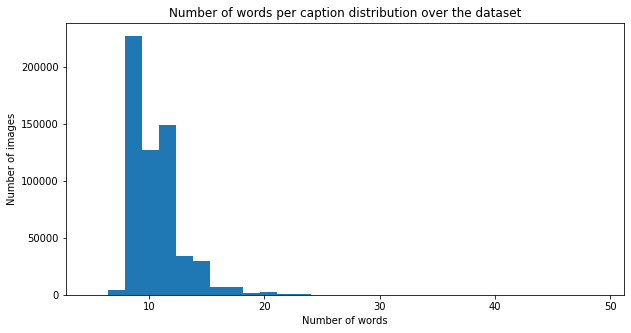

In [14]:
len_caps = [len(x['caption'].split()) for x in root_cap['annotations']]
max_len_cap = max(len_caps)
print('maximum caption length(number of words): ', max_len_cap)
plt.figure(figsize=(10,5))
plt.hist(len_caps,bins=30)
plt.xlabel('Number of words')
plt.ylabel('Number of images')
plt.title('Number of words per caption distribution over the dataset')
plt.show()

# Instances_train2017.json

## Basic High Level Information

In [15]:
# Basic High Level Information
n_images = len(root_obj['images'])
n_boxes = len(root_obj['annotations'])
n_categ = len(root_obj['categories'])
heights = [img['height'] for img in root_obj['images']]
widths = [img['width'] for img in root_obj['images']]

print('Dataset Name: ',src_desc)
print('Number of images: ',n_images)
print('Number of bounding boxes: ', n_boxes)
print('Number of classes: ', n_categ)
print('Max min avg height: ', max(heights), min(heights), int(sum(heights)/len(heights)))
print('Max min avg width: ', max(widths), min(widths), int(sum(widths)/len(widths)))

Dataset Name:  train2017_coco
Number of images:  118287
Number of bounding boxes:  860001
Number of classes:  80
Max min avg height:  640 51 484
Max min avg width:  640 59 577


## Distribution of objects across images

In [16]:
# Objects per image distribution

img2nboxes = {} # mapping "image id" to "number of boxes"

for ann in root_obj['annotations']:
    img_id = ann['image_id']
    
    if img_id in img2nboxes.keys():
        img2nboxes[img_id] += 1
    else:
        img2nboxes[img_id] = 1

nboxes_list = list(img2nboxes.values())

min_nboxes = min(nboxes_list)
max_nboxes = max(nboxes_list)
avg_nboxes = int(sum(nboxes_list)/len(nboxes_list))

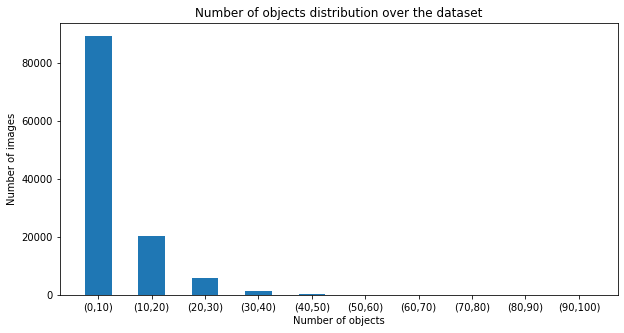

Number of images having atleast one box:  117266
Min number of boxes per image:  1
Max number of boxes per image:  93
Avg number of boxes per image:  7


In [17]:
out = pd.cut(nboxes_list, bins=np.arange(0,max_nboxes+10,10), include_lowest=True)

counts = out.value_counts().values
labels = [(int(i.left),int(i.right)) for i in out.value_counts().index.categories]

graph_xind = [i[0] for i in labels] 
ticks = [ '('+str(i[0])+','+ str(i[1])+')' for i in labels]

plt.figure(figsize=(10,5))
plt.bar(graph_xind, counts, tick_label=ticks, width=5)
plt.xlabel('Number of objects')
plt.ylabel('Number of images')
plt.title('Number of objects distribution over the dataset')
plt.show()

print("Number of images having atleast one box: ", len(nboxes_list))
print("Min number of boxes per image: ", min_nboxes)
print("Max number of boxes per image: ", max_nboxes)
print("Avg number of boxes per image: ", avg_nboxes)

## Class wise distribution of objects

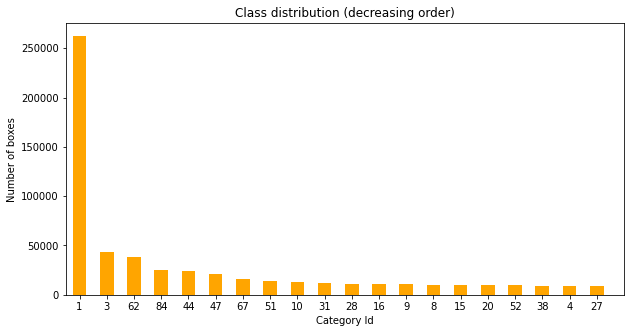

1 -> person, 2 -> bicycle, 3 -> car, 4 -> motorcycle, 5 -> airplane, 6 -> bus, 7 -> train, 8 -> truck, 9 -> boat, 10 -> traffic light, 11 -> fire hydrant, 13 -> stop sign, 14 -> parking meter, 15 -> bench, 16 -> bird, 17 -> cat, 18 -> dog, 19 -> horse, 20 -> sheep, 21 -> cow, 22 -> elephant, 23 -> bear, 24 -> zebra, 25 -> giraffe, 27 -> backpack, 28 -> umbrella, 31 -> handbag, 32 -> tie, 33 -> suitcase, 34 -> frisbee, 35 -> skis, 36 -> snowboard, 37 -> sports ball, 38 -> kite, 39 -> baseball bat, 40 -> baseball glove, 41 -> skateboard, 42 -> surfboard, 43 -> tennis racket, 44 -> bottle, 46 -> wine glass, 47 -> cup, 48 -> fork, 49 -> knife, 50 -> spoon, 51 -> bowl, 52 -> banana, 53 -> apple, 54 -> sandwich, 55 -> orange, 56 -> broccoli, 57 -> carrot, 58 -> hot dog, 59 -> pizza, 60 -> donut, 61 -> cake, 62 -> chair, 63 -> couch, 64 -> potted plant, 65 -> bed, 67 -> dining table, 70 -> toilet, 72 -> tv, 73 -> laptop, 74 -> mouse, 75 -> remote, 76 -> keyboard, 77 -> cell phone, 78 -> micro

In [18]:

# Class distribution
class2nboxes = {} 

for ann in root_obj['annotations']:
    cat_id = ann['category_id']
    
    if cat_id in class2nboxes.keys():
        class2nboxes[cat_id] += 1
    else:
        class2nboxes[cat_id] = 1

sorted_c2nb = [(k,v)for k, v in sorted(class2nboxes.items(), reverse=True, key=lambda item: item[1])]

# top 20 classes
top = min(len(sorted_c2nb),20)

# to plot
y = [i[1] for i in sorted_c2nb[:top]]
x = [i[0] for i in sorted_c2nb[:top]]

plt.figure(figsize=(10,5))
plt.bar(np.arange(len(y)),y, width=0.5,tick_label=x,color='orange')
plt.xlim(-0.5,len(y))
plt.xlabel('Category Id')
plt.ylabel('Number of boxes')
plt.title('Class distribution (decreasing order)')
plt.show()



categ_map = {x['id']: x['name'] for x in root_obj['categories']}
for k in categ_map.keys():
    print(k,'->',categ_map[k], end=", ")

## Class wise bounding box area distribution

In [19]:
# Class wise bounding box area distribution

bbox_areas = {} # key: class index, value -> a list of bounding box areas

for ann in root_obj['annotations']:
    area = ann['area']
    cat_id = ann['category_id']
    
    if area <= 0.0:
        continue
    
    if cat_id in bbox_areas.keys():
        bbox_areas[cat_id].append(area)
    else:
        bbox_areas[cat_id] = [area]


bbox_avg_areas = []

for cat in bbox_areas.keys():
    areas = bbox_areas[cat]
    avg_area = int(sum(areas)/len(areas))
    
    bbox_avg_areas.append((cat,avg_area))

bbox_avg_areas = sorted(bbox_avg_areas, key = lambda x: x[1])

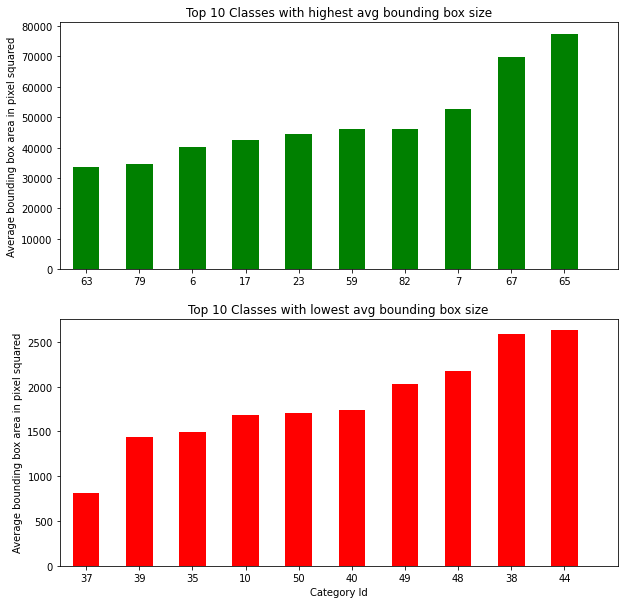

In [20]:
top = min(10, len(bbox_avg_areas))

plt.figure(figsize=(10,10))

y = [item[1] for item in bbox_avg_areas[-top:]]
x = [item[0] for item in bbox_avg_areas[-top:]]

y2 = [item[1] for item in bbox_avg_areas[:top]]
x2 = [item[0] for item in bbox_avg_areas[:top]]

plt.subplot(211)
plt.bar(np.arange(len(y)),y, width=0.5,tick_label=x,color='green')
plt.xlim(-0.5,len(y))
# plt.xlabel('Category Id')
plt.ylabel('Average bounding box area in pixel squared')
plt.title('Top '+str(top)+' Classes with highest avg bounding box size')


plt.subplot(212)
plt.bar(np.arange(len(y2)),y2, width=0.5,tick_label=x2,color='red')
plt.xlim(-0.5,len(y2))
plt.xlabel('Category Id')
plt.ylabel('Average bounding box area in pixel squared')
plt.title('Top '+str(top)+' Classes with lowest avg bounding box size')
plt.show()


## Viewing random images

http://images.cocodataset.org/train2017/000000418028.jpg
['potted plant', 'tv', 'person', 'vase', 'person', 'teddy bear']


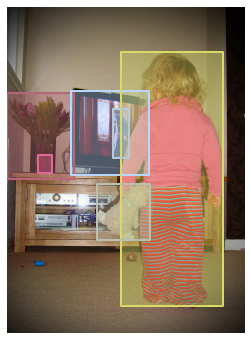

In [39]:
# pick a random image and obtain the corresponding URL
ann_id = np.random.choice(ids)
img_id = coco_obj.anns[ann_id]['image_id']
img = coco_obj.loadImgs(img_id)[0]
url = img['coco_url']

# print URL and visualize corresponding image
print(url)
plt.figure( figsize=(6,6))
I = io.imread(url)
plt.axis('off')
plt.imshow(I)
# load and display captions
annIds = coco_obj.getAnnIds(imgIds=img['id'], iscrowd=None);
anns = coco_obj.loadAnns(annIds)

# disable segmentation
for a in anns:
    if 'segmentation' in a.keys():
        a['segmentation'] = []
coco_obj.showAnns(anns, draw_bbox='False')
classes = [categ_map[a['category_id']] for a in anns]
print(classes)
plt.show()